#  3 convolution layer with kernal size(2,2) + dropout

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(2,2),
                 activation='relu',
                 input_shape=input_shape))

model_1.add(Conv2D(64, (2,2), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (2,2), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.5))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.75))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 11s 190us/step - loss: 0.6153 - acc: 0.7993 - val_loss: 0.1207 - val_acc: 0.9631
Epoch 2/12
60000/60000 [==============================] - 4s 68us/step - loss: 0.2624 - acc: 0.9226 - val_loss: 0.0732 - val_acc: 0.9768
Epoch 3/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.2112 - acc: 0.9385 - val_loss: 0.0603 - val_acc: 0.9802
Epoch 4/12
60000/60000 [==============================] - 4s 67us/step - loss: 0.1760 - acc: 0.9487 - val_loss: 0.0495 - val_acc: 0.9842
Epoch 5/12
60000/60000 [==============

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.1153 - acc: 0.9681 - val_loss: 0.0338 - val_acc: 0.9886
Epoch 2/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.1089 - acc: 0.9685 - val_loss: 0.0349 - val_acc: 0.9878
Epoch 3/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.1091 - acc: 0.9692 - val_loss: 0.0315 - val_acc: 0.9892
Epoch 4/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.1066 - acc: 0.9699 - val_loss: 0.0327 - val_acc: 0.9889
Epoch 5/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.1053 - acc: 0.9703 - val_loss: 0.0345 - val_acc: 0.9882
Epoch 6/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.1012 - acc: 0.9714 - val_loss: 0.0309 - val_acc: 0.9890
Epoch 7/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.1041 - acc: 0.9709 - val_loss: 0.0304 - val_acc

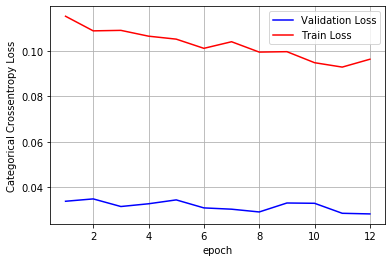

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline 
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
history = model_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model_1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 convolution layer with kernal size (5,5) + dropout layer

In [0]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=input_shape))

model_2.add(Conv2D(64, (5,5), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (5,5), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (5,5), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (5,5), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 166us/step - loss: 0.3713 - acc: 0.8864 - val_loss: 0.0477 - val_acc: 0.9861
Epoch 2/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0610 - acc: 0.9820 - val_loss: 0.0362 - val_acc: 0.9891
Epoch 3/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0450 - acc: 0.9869 - val_loss: 0.0320 - val_acc: 0.9899
Epoch 4/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0369 - acc: 0.9895 - val_loss: 0.0250 - val_acc: 0.9924
Epoch 5/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0276 - acc: 0.9920 - val_loss: 0.0325 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0260 - acc: 0.9924 - val_loss: 0.0240 - val_acc: 0.9918
Epoch 7/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0220 - acc: 0.9932 - val_loss: 0.0291 -

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0116 - acc: 0.9967 - val_loss: 0.0231 - val_acc: 0.9935
Epoch 2/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0098 - acc: 0.9969 - val_loss: 0.0280 - val_acc: 0.9931
Epoch 3/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0103 - acc: 0.9972 - val_loss: 0.0244 - val_acc: 0.9934
Epoch 4/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0097 - acc: 0.9972 - val_loss: 0.0267 - val_acc: 0.9935
Epoch 5/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0095 - acc: 0.9974 - val_loss: 0.0419 - val_acc: 0.9924
Epoch 6/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0070 - acc: 0.9981 - val_loss: 0.0324 - val_acc: 0.9939
Epoch 7/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0069 - acc: 0.9982 - val_loss: 0.0283 - 

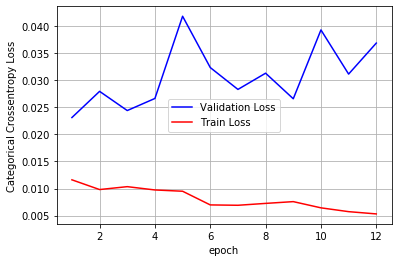

In [0]:

history = model_2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 7 convolution layer with different kernal size + dropout layer

In [0]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(7,7),
                 activation='relu',
                 input_shape=input_shape))

model_3.add(Conv2D(64, (7,7), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (7,7), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128, (5,5), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128, (5,5), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(256, (2,2), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(256, (1,1), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 135us/step - loss: 0.7312 - acc: 0.7382 - val_loss: 0.0612 - val_acc: 0.9843
Epoch 2/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0823 - acc: 0.9817 - val_loss: 0.0580 - val_acc: 0.9851
Epoch 3/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0579 - acc: 0.9867 - val_loss: 0.0457 - val_acc: 0.9890
Epoch 4/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.0461 - acc: 0.9891 - val_loss: 0.0337 - val_acc: 0.9919
Epoch 5/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0388 - acc: 0.9909 - val_loss: 0.0414 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0335 - acc: 0.9921 - val_loss: 0.0321 - val_acc: 0.9926
Epoch 7/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0286 - acc: 0.9932 - val_loss: 0.0322 - 

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0164 - acc: 0.9966 - val_loss: 0.0442 - val_acc: 0.9926
Epoch 2/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.0149 - acc: 0.9968 - val_loss: 0.0315 - val_acc: 0.9940
Epoch 3/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.0145 - acc: 0.9968 - val_loss: 0.0284 - val_acc: 0.9937
Epoch 4/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0142 - acc: 0.9970 - val_loss: 0.0297 - val_acc: 0.9935
Epoch 5/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.0116 - acc: 0.9974 - val_loss: 0.0356 - val_acc: 0.9924
Epoch 6/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.0120 - acc: 0.9975 - val_loss: 0.0362 - val_acc: 0.9940
Epoch 7/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.0120 - acc: 0.9972 - val_loss: 0.0339 - 

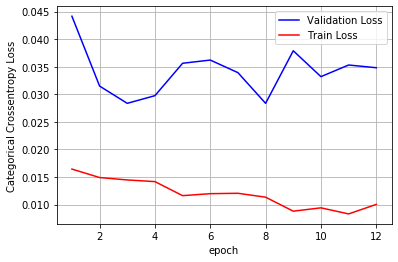

In [9]:

history = model_3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model_3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [10]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Test loss", "Test accuracy"]

x.add_row(["3 convolution layer with kernal size(2,2) + dropout layer",0.03, 0.98])
x.add_row(["5 convolution layer with kernal size(5,5) + dropout layer",14.53, 0.09])
x.add_row(["7 convolution layer with different kernal size + dropout layer",14.49, 0.10])


 
print(x)

+----------------------------------------------------------------+-----------+---------------+
|                             Model                              | Test loss | Test accuracy |
+----------------------------------------------------------------+-----------+---------------+
|   3 convolution layer with kernal size(2,2) + dropout layer    |    0.03   |      0.98     |
|   5 convolution layer with kernal size(5,5) + dropout layer    |   14.53   |      0.09     |
| 7 convolution layer with different kernal size + dropout layer |   14.49   |      0.1      |
+----------------------------------------------------------------+-----------+---------------+
